Eval for LINEAR REGRESSION  [0.1139935  0.06222696]


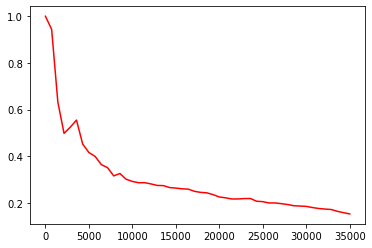

In [53]:
import numpy as np
import pandas as pd
from sympy import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


#combined_data
train = pd.read_csv('train.csv',header=None)
test = pd.read_csv('test.csv',header=None)
val = pd.read_csv('val.csv',header=None)

#using validation data for different prediction models and check for least E_in
#processing_data to 20 columns
i=0;
data1=pd.DataFrame()
while(i<1080):
    data1=pd.DataFrame.append(data1,val.iloc[:,i:(i+120)].mean(axis=1),ignore_index=True)
    i=i+120;
i=1080;    
while(i<1094):
    data1=pd.DataFrame.append(data1,val.iloc[:,i:(i+2)].T,ignore_index=True)
    i=i+2;
    data1=pd.DataFrame.append(data1,val.iloc[:,i:(i+2)].sum(axis=1),ignore_index=True)
    i=i+2;

data1=data1.T
data1=data1.iloc[:,0:20]
Xval=data1.iloc[:,0:18]
Yval=data1.iloc[:,18:20]


j=0;
test1=pd.DataFrame()
while(j<1080):
    test1=pd.DataFrame.append(test1,test.iloc[:,j:(j+120)].mean(axis=1),ignore_index=True)
    j=j+120;
j=1080;    
while(j<1094):
    test1=pd.DataFrame.append(test1,test.iloc[:,j:(j+2)].T,ignore_index=True)
    j=j+2;
    test1=pd.DataFrame.append(test1,test.iloc[:,j:(j+2)].sum(axis=1),ignore_index=True)
    j=j+2;

test1=test1.T
test1=test1.iloc[:,0:20]
Xtest=test1.iloc[:,0:18]
Ytest=test1.iloc[:,18:20]


k=0;
train1=pd.DataFrame()
while(k<1080):
    train1=pd.DataFrame.append(train1,train.iloc[:,k:(k+120)].mean(axis=1),ignore_index=True)
    k=k+120;
k=1080;    
while(k<1094):
    train1=pd.DataFrame.append(train1,train.iloc[:,k:(k+2)].T,ignore_index=True)
    k=k+2;
    train1=pd.DataFrame.append(train1,train.iloc[:,k:(k+2)].sum(axis=1),ignore_index=True)
    k=k+2;

train1=train1.T
train1=train1.iloc[:,0:20]
Xtrain=train1.iloc[:,0:18]
Ytrain=train1.iloc[:,18:20]

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(Xtrain,Ytrain)
weights=model.coef_
Yval_pred=model.predict(Xval)
Eval=mean_squared_error(Yval.iloc[:,0:2],Yval_pred[:,:], multioutput='raw_values')
print('Eval for LINEAR REGRESSION ',Eval)


#learning curve
training_sizes, training_scores,validation_scores = learning_curve(
    estimator = model,
    X = Xval,
    y = Yval,
    train_sizes = np.linspace(5, len(Xval) * 0.8, dtype = int) 
)
line1 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'r')




Epoch 1/50
90/90 [==============================] - 0s 2ms/step - loss: 0.4817 - val_loss: 0.4163
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3755 - val_loss: 0.3796
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3502 - val_loss: 0.3601
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3361 - val_loss: 0.3460
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3266 - val_loss: 0.3365
Epoch 6/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3196 - val_loss: 0.3300
Epoch 7/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3143 - val_loss: 0.3253
Epoch 8/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3098 - val_loss: 0.3215
Epoch 9/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3057 - val_loss: 0.3182
Epoch 10/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3020 - val_loss: 0.3154
Epoch 11/50
90/90 [

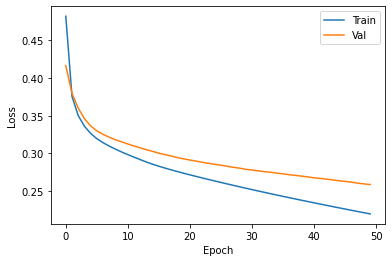

In [57]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

neural = Sequential([
    Dense(18, activation='tanh'),
    Dense(18, activation='tanh'),
    Dense(2, activation='sigmoid')
])
neural.compile(optimizer='sgd',
              loss='binary_crossentropy')

#for translational velocity

hist = neural.fit(Xtrain, Ytrain, batch_size=1000, epochs=50,validation_data=(Xval, Yval))

Yval_pred1=neural.predict(Xval)
Eval1=mean_squared_error(Yval.iloc[:,0:1],Yval_pred1[:,0], multioutput='raw_values')
print('Eval of translational velocity for Neural Network',Eval1)
Eval2=mean_squared_error(Yval.iloc[:,1:2],Yval_pred1[:,1], multioutput='raw_values')
print('Eval of rotational velocity for Neural Network',Eval2)

#learning curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()

Epoch 1/50
90/90 [==============================] - 3s 29ms/step - loss: 0.2972 - val_loss: 0.2619
Epoch 2/50
90/90 [==============================] - 3s 28ms/step - loss: 0.2292 - val_loss: 0.2337
Epoch 3/50
90/90 [==============================] - 3s 29ms/step - loss: 0.1933 - val_loss: 0.2066
Epoch 4/50
90/90 [==============================] - 3s 29ms/step - loss: 0.1602 - val_loss: 0.1828
Epoch 5/50
90/90 [==============================] - 3s 28ms/step - loss: 0.1271 - val_loss: 0.1526
Epoch 6/50
90/90 [==============================] - 2s 27ms/step - loss: 0.0925 - val_loss: 0.1213
Epoch 7/50
90/90 [==============================] - 3s 29ms/step - loss: 0.0562 - val_loss: 0.0910
Epoch 8/50
90/90 [==============================] - 3s 29ms/step - loss: 0.0181 - val_loss: 0.0563
Epoch 9/50
90/90 [==============================] - 3s 28ms/step - loss: -0.0228 - val_loss: 0.0194
Epoch 10/50
90/90 [==============================] - 3s 29ms/step - loss: -0.0659 - val_loss: -0.0192
Epoch 

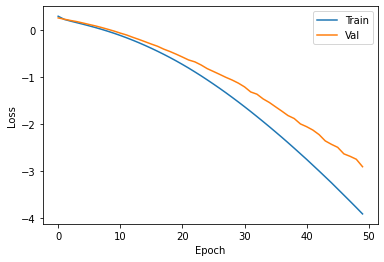

Epoch 1/50
90/90 [==============================] - 4s 43ms/step - loss: 10.5262 - val_loss: 10.2790
Epoch 2/50
90/90 [==============================] - 4s 42ms/step - loss: 10.1062 - val_loss: 9.9008
Epoch 3/50
90/90 [==============================] - 4s 42ms/step - loss: 9.7294 - val_loss: 9.5415
Epoch 4/50
90/90 [==============================] - 4s 42ms/step - loss: 9.3713 - val_loss: 9.1947
Epoch 5/50
90/90 [==============================] - 4s 41ms/step - loss: 9.0266 - val_loss: 8.8605
Epoch 6/50
90/90 [==============================] - 4s 41ms/step - loss: 8.6943 - val_loss: 8.5347
Epoch 7/50
90/90 [==============================] - 4s 43ms/step - loss: 8.3753 - val_loss: 8.2228
Epoch 8/50
90/90 [==============================] - 4s 41ms/step - loss: 8.0652 - val_loss: 7.9202
Epoch 9/50
90/90 [==============================] - 4s 43ms/step - loss: 7.7658 - val_loss: 7.6273
Epoch 10/50
90/90 [==============================] - 4s 44ms/step - loss: 7.4767 - val_loss: 7.3436
Epoch 

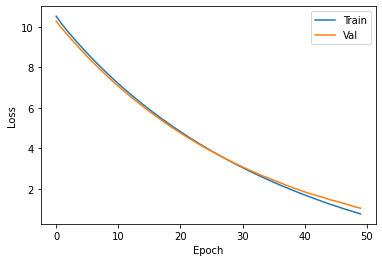

In [58]:
from keras.layers import Dropout
from keras import regularizers

#data is purposefully overfitted to show hor regularization works with λ being 0.01
neural1 = Sequential([
    Dense(1000, activation='tanh'),
    Dense(1000, activation='tanh'),
    Dense(2, activation='sigmoid')])

neural1.compile(optimizer='sgd',
              loss='binary_crossentropy')

hist1 = neural1.fit(Xtrain, Ytrain,batch_size=1000, epochs=50,validation_data=(Xval, Yval))

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
neural2 = Sequential([
    Dense(1000, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))])

neural2.compile(optimizer='sgd',
              loss='binary_crossentropy')

hist2 = neural2.fit(Xtrain, Ytrain,batch_size=1000, epochs=50,validation_data=(Xval, Yval))
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [51]:
#to_test
Xtest=test1.iloc[:,0:18]
Ytest=test1.iloc[:,18:20]
Ytest_pred=neural.predict(Xtest)

Etest_linvel=mean_squared_error(Ytest.iloc[:,0:1],Ytest_pred[:,0])
print('Etest for lin vel',Etest_linvel)
Etest_angvel=mean_squared_error(Ytest.iloc[:,1:2],Ytest_pred[:,1])
print('Etest for ang vel',Etest_angvel)
dvc=19
tol=0.1

E_out = Etest_linvel + np.sqrt((8/35861)*np.log(4*((2*35861)**(dvc+1))/tol))
print('Eout for translational velocity',E_out)
E_out1 = Etest_angvel + np.sqrt((8/35861)*np.log(4*((2*35861)**(dvc+1))/tol))
print('Eout for rotational velocity',E_out1)


Etest for lin vel 0.0843801184253638
Etest for ang vel 0.04773384888149761
Eout for translational velocity 0.30956200431383674
Eout for rotational velocity 0.27291573476997055
